# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option("max_columns", 100)

In [3]:
pd.set_option("max_rows", 100)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [272]:
df_m = pd.read_csv("ANSUR II MALE Public.csv")
df_f = pd.read_csv("ANSUR II FEMALE Public.csv") # read csv and define to veriable

In [5]:
df_f

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,...,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,...,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,...,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,...,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,...,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right ha

In [6]:
df_m

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,.

In [7]:
df_m.info(verbose=True) # use verbose in the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [206]:
df_f.select_dtypes(include="object").describe() # show all objects in df 

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
count,1986,1986,1986,1986,1986,1986,1986,519,1986
unique,1,127,11,3,3,181,119,112,3
top,Female,5-Apr-12,Fort Gordon,Regular Army,Combat Service Support,92A,California,Mexican,Right hand
freq,1986,44,410,1020,1256,214,154,135,1773


In [207]:
df_m.select_dtypes(include="object").describe()

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
count,4082,4082,4082,4082,4082,4082,4082,902,4082
unique,1,185,11,3,3,229,126,159,3
top,Male,21-Feb-12,Camp Shelby,Regular Army,Combat Service Support,11B,New York,Mexican,Right hand
freq,4082,43,772,2120,1918,671,314,222,3577


In [273]:
df = pd.concat([df_m,df_f],axis=0, ignore_index=True)

In [209]:
df.shape

(6068, 109)

In [274]:
df.drop(columns = ["Installation","Component","Branch" ,"Date","Ethnicity","PrimaryMOS","Heightin","Weightlbs","SubjectNumericRace","subjectid"],axis = 1,inplace=True) 
# drop columns that have no effect on the target

In [275]:
df.DODRace.value_counts() # target value counts

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [276]:
drop_list = []  # Columns with more than 1500 null values
for col in df :
    if df[col].isnull().sum() > 1500:
        print(f"{col} = {df[col].isnull().sum()}")
        drop_list.append(col)
drop_list

SubjectId = 4082


['SubjectId']

In [277]:
df.drop(drop_list, axis=1, inplace=True) # drop the 'drop_list'

In [214]:
df.isnull().sum().any()  # no more isnull columns

False

In [215]:
df.shape # new shape

(6068, 98)

In [278]:
df = df[~(df.DODRace > 3)] # Drop DODRace class if value count below 500
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [279]:
df.DODRace.unique()

array([1, 2, 3], dtype=int64)

In [280]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [281]:
df.DODRace = df.DODRace.astype('category').map({1 :"White",2:"Hispanic",3:"Black"})

In [282]:
df.DODRace.value_counts()

White       3792
Hispanic    1298
Black        679
Name: DODRace, dtype: int64

In [226]:
df[df.duplicated()] # Don't have duplicate

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference


In [227]:
df2 = df.copy()

In [283]:
df.reset_index(drop=True, inplace=True) 

In [284]:
df_temp = df.corr() # I detected columns with high correlation
feature = []
collinear = []
for col in df_temp.columns:
    for i in df_temp.index :
        if (df_temp[col][i] > 0.9 and df_temp[col][i] < 1) or (df_temp[col][i] < -0.9 and df_temp[col][i] > -1):
            feature.append(col)
            collinear.append(i)

In [285]:
my_dict = {"feature": feature, "collinear":collinear} # return DataFrame
df_col = pd.DataFrame(my_dict)
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
...,...,...
281,weightkg,chestcircumference
282,weightkg,verticaltrunkcircumferenceusa
283,wristcircumference,handcircumference
284,wristheight,acromialheight


In [286]:
df.shape

(5769, 98)

## Explore Data

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [232]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [287]:
X=df.drop(["DODRace"], axis=1) # Identify X and y
X = pd.get_dummies(data=X, drop_first=True)
y=df["DODRace"]

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=101) # Use stratify because I have imbalanced data

In [289]:
print("Train features shape : ", X_train.shape) 
print("Train features shape : ", y_train.shape)
print("Test features shape : ", X_test.shape)
print("Test features shape : ", y_test.shape)


Train features shape :  (4615, 232)
Train features shape :  (4615,)
Test features shape :  (1154, 232)
Test features shape :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [32]:
from sklearn.linear_model import LogisticRegression 

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [290]:
def eval_metric(model, X_train, y_train, X_test, y_test): # Identify to Test and Train data metrics
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [291]:
from sklearn.pipeline import Pipeline # I use to Pipeline and let's not forget that zero and one data is too much. I prefer MinMaxScaler. Also Pipline prevents data leakage
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=101))]
pipe_log_model = Pipeline(steps=operations)
# class_weight = balance (impalanced data layouts)

In [292]:
pipe_log_model.fit(X_train, y_train) # Train the model and show results
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[101  13  22]
 [ 11 238  11]
 [ 93  27 638]]
              precision    recall  f1-score   support

       Black       0.49      0.74      0.59       136
    Hispanic       0.86      0.92      0.88       260
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 457   17   69]
 [  35  974   29]
 [ 367   61 2606]]
              precision    recall  f1-score   support

       Black       0.53      0.84      0.65       543
    Hispanic       0.93      0.94      0.93      1038
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [37]:
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score # I use make_scorer as we will focus specifically on Hispanic

In [38]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels = ["Hispanic"]),
           "precision_Hispanic": make_scorer(precision_score, average = None, labels = ["Hispanic"]),
           "recall_Hispanic": make_scorer(recall_score , average=None, labels=["Hispanic"])}

In [39]:
from sklearn.model_selection import cross_validate

In [40]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=scoring ,cv=5)   # After training use the CV
df_scores = pd.DataFrame(scores, index= range(1,6))
df_scores.mean()[2:]

test_f1_Hispanic           0.601243
test_precision_Hispanic    0.493275
test_recall_Hispanic       0.771611
dtype: float64

### Logistic Model GridsearchCV

In [41]:
from sklearn.model_selection import GridSearchCV  # After CV use GridSearchCV 

In [42]:
recall_Hispanic = make_scorer(recall_score, average=None, labels = ["Hispanic"]) # I defined recall_Hispanic. My aim to improve this every time in GridSearch

In [43]:
param_grid = {"log__C" : [0.1, 0.5, 1],
            "log__penalty":["l1","l2"],
            "log__solver":["liblinear","lbfgs"]}  # Identify to try param_girid parameters

In [44]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                                param_grid,
                                verbose=3,
                                scoring=recall_Hispanic,
                                n_jobs=1, cv=5)

In [45]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END log__C=0.1, log__penalty=l1, log__solver=liblinear;, score=0.578 total time=   0.4s
[CV 2/5] END log__C=0.1, log__penalty=l1, log__solver=liblinear;, score=0.505 total time=   0.4s
[CV 3/5] END log__C=0.1, log__penalty=l1, log__solver=liblinear;, score=0.477 total time=   0.5s
[CV 4/5] END log__C=0.1, log__penalty=l1, log__solver=liblinear;, score=0.509 total time=   0.3s
[CV 5/5] END log__C=0.1, log__penalty=l1, log__solver=liblinear;, score=0.537 total time=   0.4s
[CV 1/5] END log__C=0.1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END log__C=0.1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END log__C=0.1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END log__C=0.1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END log__C=0.1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [46]:
log_model_grid.best_params_ # Result : Best paramteres equal is default parameters

{'log__C': 0.5, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [47]:
log_model_grid.best_score_

0.773462453278967

In [48]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test) # I want to identify the Hispanic ones. I will try to improve Hispanic scores in every future work.

Test_Set
[[238  13   9]
 [ 10 104  22]
 [ 19  86 653]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.51      0.76      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 966   43   29]
 [  22  449   72]
 [  70  359 2605]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.53      0.83      0.64       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



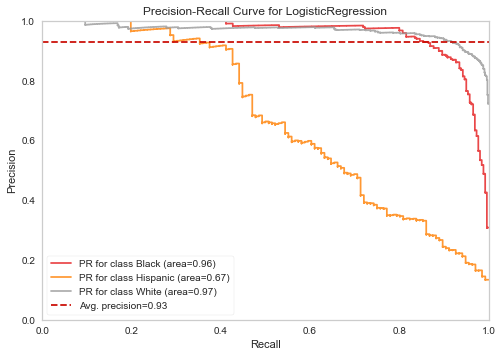

In [49]:
from yellowbrick.classifier import PrecisionRecallCurve # İmbalanced datas using PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [50]:
viz.score_ # The power of this model to detect Hispanics : 0.67

{'Black': 0.958737515163091,
 'Hispanic': 0.6746092956825716,
 'White': 0.9676301605980829,
 'micro': 0.9304218286184772}

In [51]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
# I made definitions to compare the results of each model last(Hispanic).I use average=None because I don't want average. Only Hispanic class score

### Liblinear

In [52]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    solver="liblinear", penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations) # i know it is important to use liblinear in small data. Also should " penalty=l1" choice.

In [53]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test) # Train and Result

Test_Set
[[241   5  14]
 [ 11  81  44]
 [ 14  37 707]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       260
    Hispanic       0.66      0.60      0.63       136
       White       0.92      0.93      0.93       758

    accuracy                           0.89      1154
   macro avg       0.83      0.82      0.82      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[ 975   16   47]
 [  28  385  130]
 [  45  152 2837]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.70      0.71      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [54]:
model = Pipeline(steps=operations) # CV Results with liblinear.

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.661327
test_precision_Hispanic    0.660427
test_recall_Hispanic       0.663030
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [55]:
#help(SVC)

In [56]:
from sklearn.svm import SVC, LinearSVC

In [57]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced", random_state=101))] 
pipe_svc_model = Pipeline(steps=operations_svc)

In [58]:
pipe_svc_model.fit(X_train, y_train) # Train SVC model and results.

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  13  12]
 [  9  98  29]
 [ 15 119 624]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.43      0.72      0.54       136
       White       0.94      0.82      0.88       758

    accuracy                           0.83      1154
   macro avg       0.76      0.82      0.77      1154
weighted avg       0.87      0.83      0.84      1154


Train_Set
[[ 955   40   43]
 [  25  448   70]
 [  49  425 2560]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



### Cross Validate SVC

In [59]:
model = Pipeline(steps=operations_svc) # confirm to result

scores = cross_validate(model, X_train, y_train, scoring=scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic           0.581309
test_precision_Hispanic    0.463860
test_recall_Hispanic       0.780774
dtype: float64

### SVC Model GridSearchCV

In [60]:
param_grid = {
        "svc__C" : [1,2,3],
        "svc__gamma" : ["scale", "auto", 1, 0.1, 0.01]
            }

In [61]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced", random_state= 42))]
model = Pipeline(steps = operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [62]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [63]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

In [64]:
svm_model_grid.best_score_

0.7826367652055726

In [65]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)  # The SVC model especially raised the recall result. But my other results are worse

Test_Set
[[235  13  12]
 [  9  98  29]
 [ 15 119 624]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.43      0.72      0.54       136
       White       0.94      0.82      0.88       758

    accuracy                           0.83      1154
   macro avg       0.76      0.82      0.77      1154
weighted avg       0.87      0.83      0.84      1154


Train_Set
[[ 955   40   43]
 [  25  448   70]
 [  49  425 2560]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



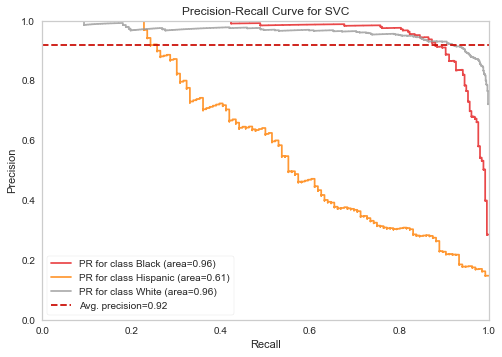

In [66]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(C=1, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();  # The power of this model to detect Hispanics : 0.61

In [67]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [68]:
from sklearn.preprocessing import OrdinalEncoder
# We use OrdinalEncoder for accurate and healthy results in TreeBase models.

In [69]:
X2 = df.drop("DODRace", axis=1) # I defined it as X2 to avoid complexity
y = df["DODRace"]

In [70]:
cat = X2.select_dtypes("object").columns # I assigned the object columns to cat2
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [71]:
enc = OrdinalEncoder()  
X2[cat] = enc.fit_transform(X2[cat]) # OrdinalEncoder returns numeric value of all categorical and unique values
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,21,2.0


In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, stratify = y, test_size= 0.2, random_state=101) # new variables, new split

In [73]:
print("Train features shape:", X_train2.shape)
print("Train target shape:", y_train2.shape)
print("Test features shape:", X_test2.shape)
print("Test target shape:", y_test2.shape)

Train features shape: (4615, 97)
Train target shape: (4615,)
Test features shape: (1154, 97)
Test target shape: (1154,)


### Vanilla RF Model

In [76]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [77]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [78]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2) # I use the balanced but scores is very bad. I changes hyperparamters next steps and try again.

Test_Set
[[184   1  75]
 [ 15   3 118]
 [  7   1 750]]
              precision    recall  f1-score   support

       Black       0.89      0.71      0.79       260
    Hispanic       0.60      0.02      0.04       136
       White       0.80      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.76      0.57      0.57      1154
weighted avg       0.79      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [79]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic           0.076361
test_precision_Hispanic    0.730000
test_recall_Hispanic       0.040539
dtype: float64

### RF Model GridsearchCV

In [80]:
param_grid = {"n_estimators":[400, 500],
              "max_depth": [None, 10, 12, 14, 16],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [18, 20, 22], # This is important for overfitting but very tiring for cpu.
              "max_features":['auto', None, 15, 20]}

In [81]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

rf_grid_model = GridSearchCV(rf_model,
                          param_grid=param_grid,
                          verbose = 3 ,
                          scoring = recall_Hispanic,
                          n_jobs = -1)

In [82]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 12, 14, 16],
                         'max_features': ['auto', None, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [18, 20, 22],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [83]:
rf_grid_model.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 22,
 'n_estimators': 500}

In [84]:
rf_grid_model.best_score_

0.3996432212028542

In [85]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2) # Results are balanced and better than default parameters. But genaraly result is very bad.

Test_Set
[[214  10  36]
 [ 20  47  69]
 [ 35  65 658]]
              precision    recall  f1-score   support

       Black       0.80      0.82      0.81       260
    Hispanic       0.39      0.35      0.36       136
       White       0.86      0.87      0.87       758

    accuracy                           0.80      1154
   macro avg       0.68      0.68      0.68      1154
weighted avg       0.79      0.80      0.79      1154


Train_Set
[[ 987    6   45]
 [  10  502   31]
 [  67   86 2881]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.85      0.92      0.88       543
       White       0.97      0.95      0.96      3034

    accuracy                           0.95      4615
   macro avg       0.92      0.94      0.93      4615
weighted avg       0.95      0.95      0.95      4615



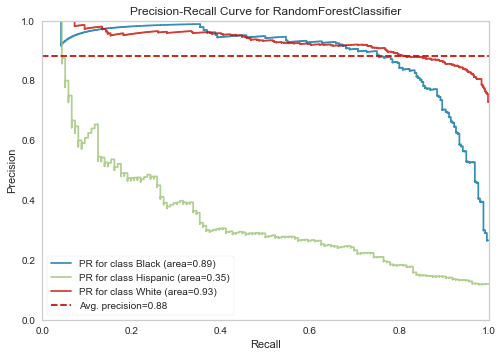

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [86]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators=500)

viz = PrecisionRecallCurve(model,
                            per_class="True",
                            classes = ["Black", "Hispanic", "White"],
                            cmapp = "Set1")
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show()  # The power of this model to detect Hispanics : 0.35

In [87]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

In [88]:
#conda install -c anaconda py-xgboost

### Vanilla XGBoost Model

In [89]:
from xgboost import XGBClassifier

In [90]:
xgb_model1 = XGBClassifier(random_state = 101)

In [91]:
from sklearn.utils import class_weight # My dataset is imbalanced. But class_weight is not available in XGBClassifier model. So I am using class_weight function from sklearn library.
classes_weights = class_weight.compute_sample_weight(class_weight = "balanced", y = y_train2)
classes_weights
# 'scale_pos_weight' paramteter can only be used binary classification in XGBoost model.

array([2.8330264 , 2.8330264 , 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [92]:
xgb_model1.fit(X_train2, y_train2, sample_weight = classes_weights) 

[12:35:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=101, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [93]:
eval_metric(xgb_model1, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[231   5  24]
 [ 13  48  75]
 [ 16  27 715]]
              precision    recall  f1-score   support

       Black       0.89      0.89      0.89       260
    Hispanic       0.60      0.35      0.44       136
       White       0.88      0.94      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.73      0.75      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [94]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring=scoring, cv = 10, fit_params={"sample_weight" : classes_weights})
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:] # XGBoost CV Result better than RandomForest model. Check GridSearchCV now. 

[12:35:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

test_f1_Hispanic           0.594651
test_precision_Hispanic    0.749847
test_recall_Hispanic       0.495623
dtype: float64

### XGBoost Model GridsearchCV

In [95]:
y_train2

397     Hispanic
3261    Hispanic
5285       White
2080    Hispanic
4065       Black
          ...   
5283    Hispanic
2099    Hispanic
2782       White
3753       White
3942       White
Name: DODRace, Length: 4615, dtype: object

In [96]:
comp = pd.DataFrame(classes_weights) # class_weights return to DataFrame defined comp.

comp["label"] = y_train2.reset_index(drop=True) # drop index numbers.
comp.groupby("label")[0].value_counts() # Return the all labels. Show the weighted coeff and counts.

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

In [97]:
param_grid = {"n_estimators":[100, 300],
                "max_depth":[3,5,6],
                "learning_rate":[0.1,0.3],
                "colsample_bytree":[0.5,1]}

In [98]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model,
                                param_grid,
                                scoring=recall_Hispanic,
                                n_jobs=-1,
                                verbose=2).fit(X_train2, y_train2, sample_weight=classes_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[12:37:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100}

In [100]:
xgb_grid_model.best_score_

0.6723411484879375

In [101]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2) 

Test_Set
[[226  15  19]
 [ 18  77  41]
 [ 29 107 622]]
              precision    recall  f1-score   support

       Black       0.83      0.87      0.85       260
    Hispanic       0.39      0.57      0.46       136
       White       0.91      0.82      0.86       758

    accuracy                           0.80      1154
   macro avg       0.71      0.75      0.72      1154
weighted avg       0.83      0.80      0.81      1154


Train_Set
[[ 979   22   37]
 [  13  462   68]
 [  95  342 2597]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.56      0.85      0.67       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



[12:37:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


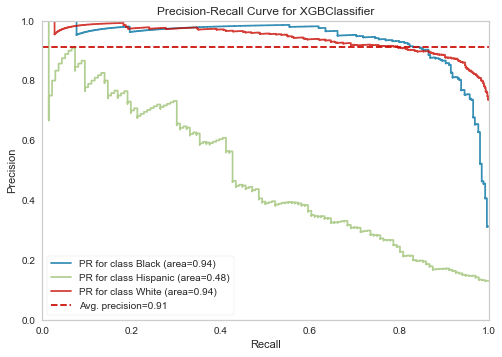

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [102]:
model = XGBClassifier(random_state=101, colsample_bytree=0.5, subsample=.5)

viz = PrecisionRecallCurve(model,
                            per_class="True",
                            classes = ["Black", "Hispanic", "White"],
                            cmapp = "Set1")
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show() # Hispanic : 0.48

In [103]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"]) 

### Comparing Model

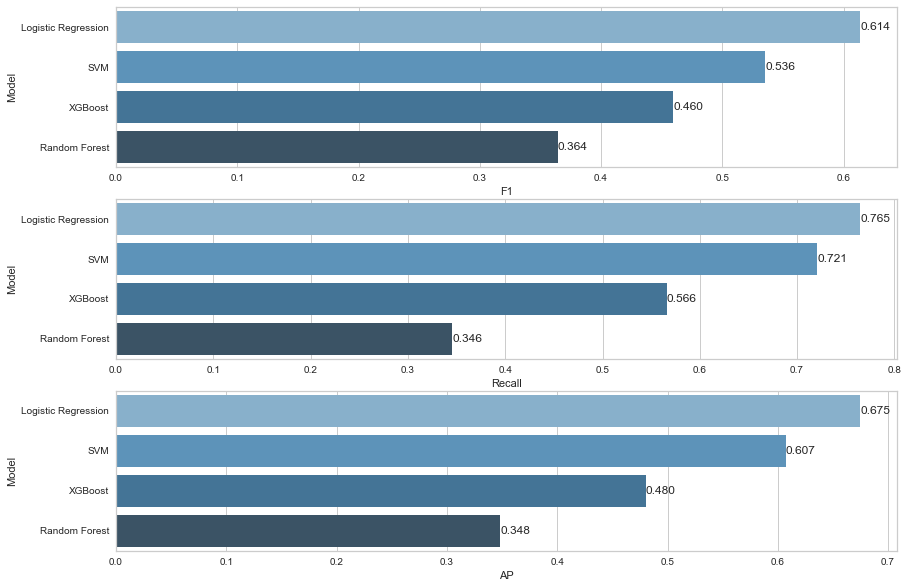

In [104]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show() # All models comparing. I choice LogisticReggression.

----
----

In [293]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations) 

In [294]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [295]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,...,SubjectsBirthLocation_Nicaragua,SubjectsBirthLocation_Nigeria,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Panama,SubjectsBirthLocation_Paraguay,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthLocation_South Africa,SubjectsBirthLocation_South America,SubjectsBirthLocation_South Carolina,SubjectsBirthLocation_South Dakota,SubjectsBirthLocation_South Korea,SubjectsBirthLocation_Sri Lanka,SubjectsBirthLocation_Sudan,SubjectsBirthLocation_Syria,SubjectsBirthLocation_Tennessee,SubjectsBirthLocation_Texas,SubjectsBirthLocation_Togo,SubjectsBirthLocation_Trinidad and Tobago,SubjectsBirthLocation_Turkey,SubjectsBirthLocation_US Virgin Islands,SubjectsBirthLocation_Ukraine,SubjectsBirthLocation_United Kingdom,SubjectsBirthLocation_United States,SubjectsBirthLocation_Utah,SubjectsBirthLocation_Venezuela,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,WritingPreference_Left hand,WritingPreference_Right hand
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,...,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.00000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000
mean,247.254290,1408.630265,328.071590,225.201768,1301.902583,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,72.335413,324.962212,306.677760,139.529381,1022.059456,242.234356,872.112845,610.449991,498.331773,386.316519,1479.952158,283.232623,1024.206622,252.322586,1254.290172,827.1057

In [296]:
mean_human = X.describe().loc["mean"]  # I want to get prediction from final model with mean values. I'll compare it with real data later
mean_human

abdominalextensiondepthsitting      247.254290
acromialheight                     1408.630265
acromionradialelength               328.071590
anklecircumference                  225.201768
axillaheight                       1301.902583
                                      ...     
SubjectsBirthLocation_Wisconsin       0.017161
SubjectsBirthLocation_Wyoming         0.001213
SubjectsBirthLocation_Zambia          0.000173
WritingPreference_Left hand           0.107818
WritingPreference_Right hand          0.881955
Name: mean, Length: 232, dtype: float64

In [297]:
final_model.predict(X.loc[[201]]) # The dimention the model in which it is trained and the dimention the prediction must be the same.

array(['Black'], dtype=object)

In [298]:
y[201] # real data

'Black'

In [299]:
final_model.predict([mean_human]) # predict to mean_human.

array(['White'], dtype=object)

In [300]:
from sklearn.metrics import matthews_corrcoef # This module subtracts an average score from f1_score, accuracy, recall scores

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7662395041309528

In [301]:
from sklearn.metrics import cohen_kappa_score # This module subtracts an average score from f1_score, accuracy, recall scores
cohen_kappa_score(y_test, y_pred)

0.7576172959946496

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [302]:
#pip install imblearn

In [303]:
#pip install pyforest

In [304]:
#pip install plotly

In [305]:
#conda install -c conda-forge cufflinks-py

In [306]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

### I created a final model. But how much can I improve? I will try smote and shap apps for this

In [307]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline # import Imblearn library and Pipeline(Imblearn)

In [308]:
over = SMOTE(sampling_strategy={"Hispanic":1200})
under = RandomUnderSampler(sampling_strategy={"White":2500})
# I'm artificially creating a balanced dataset with SMOTE and RandomUnderSampler function. It is not recommended to use a single Smote or RandomUnderSampler.

In [309]:
X_resempled_over, y_resempled_over = over.fit_resample(X_train, y_train) 

In [310]:
len(X_train)

4615

In [311]:
len(X_resempled_over)

4777

In [312]:
y_resempled_over.value_counts()

White       3034
Hispanic    1200
Black        543
Name: DODRace, dtype: int64

In [313]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [314]:
y_resampled_under.value_counts()

White       2500
Hispanic    1038
Black        543
Name: DODRace, dtype: int64

In [315]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [316]:
y_resampled.value_counts()

White       2500
Hispanic    1200
Black        543
Name: DODRace, dtype: int64

In [317]:
y_train.value_counts()

White       3034
Hispanic    1038
Black        543
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

In [318]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [319]:
smote_pipeline = imbpipeline(steps=operations)

In [320]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [321]:
y_train

4494    Hispanic
196        White
3821       White
3206       White
4092       Black
          ...   
4835    Hispanic
1487       White
3812       White
4466       Black
1748       White
Name: DODRace, Length: 4615, dtype: category
Categories (3, object): ['White', 'Hispanic', 'Black']

In [322]:
y_test

2019       White
4046       White
5563       White
3806       White
121     Hispanic
          ...   
2536       White
905        White
4429       White
5286       White
3476    Hispanic
Name: DODRace, Length: 1154, dtype: category
Categories (3, object): ['White', 'Hispanic', 'Black']

In [323]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test) # I've found that SMOTE gives worse results.

Test_Set
[[102  12  22]
 [ 11 238  11]
 [ 94  25 639]]
              precision    recall  f1-score   support

       Black       0.49      0.75      0.59       136
    Hispanic       0.87      0.92      0.89       260
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 459   15   69]
 [  37  971   30]
 [ 369   60 2605]]
              precision    recall  f1-score   support

       Black       0.53      0.85      0.65       543
    Hispanic       0.93      0.94      0.93      1038
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [324]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.907400
test_precision_Hispanic    0.906133
test_recall_Hispanic       0.909494
dtype: float64

## SVC Over/Under Sampling

In [325]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

In [326]:
smote_pipeline_svc = imbpipeline(steps=operations)

In [327]:
smote_pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('svc', SVC(C=2, class_weight='balanced', random_state=101))])

In [328]:
eval_metric(smote_pipeline_svc, X_train, y_train, X_test, y_test) # I try SHAP next step for better results.

Test_Set
[[102  13  21]
 [ 15 232  13]
 [104  16 638]]
              precision    recall  f1-score   support

       Black       0.46      0.75      0.57       136
    Hispanic       0.89      0.89      0.89       260
       White       0.95      0.84      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.78      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[ 472   12   59]
 [  38  966   34]
 [ 419   49 2566]]
              precision    recall  f1-score   support

       Black       0.51      0.87      0.64       543
    Hispanic       0.94      0.93      0.94      1038
       White       0.97      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.91      0.87      0.88      4615



## RF Over/ Under Sampling

## Xgboost Over/ Under Sampling

In [329]:
operations = [('o', over), ('u', under), 
              ("xgb", XGBClassifier(random_state=101))]

In [330]:
smote_pipeline_xgb = imbpipeline(steps=operations)

In [331]:
smote_pipeline_xgb.fit(X_train2, y_train2)

[14:02:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_po

In [332]:
eval_metric(smote_pipeline_xgb, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[227   7  26]
 [ 13  51  72]
 [ 12  29 717]]
              precision    recall  f1-score   support

       Black       0.90      0.87      0.89       260
    Hispanic       0.59      0.38      0.46       136
       White       0.88      0.95      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.73      0.75      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   8   10 3016]]
              precision    recall  f1-score   support

       Black       0.99      1.00      1.00      1038
    Hispanic       0.98      1.00      0.99       543
       White       1.00      0.99      1.00      3034

    accuracy                           1.00      4615
   macro avg       0.99      1.00      0.99      4615
weighted avg       1.00      1.00      1.00      4615



- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [333]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7576172959946496

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [334]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [369]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [370]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga') # penalty=l1 should. Because only Lasso can be feature selection.
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [371]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test) 

Test_Set
[[100  14  22]
 [ 11 237  12]
 [ 95  27 636]]
              precision    recall  f1-score   support

       Black       0.49      0.74      0.58       136
    Hispanic       0.85      0.91      0.88       260
       White       0.95      0.84      0.89       758

    accuracy                           0.84      1154
   macro avg       0.76      0.83      0.79      1154
weighted avg       0.87      0.84      0.85      1154


Train_Set
[[ 458   18   67]
 [  32  980   26]
 [ 360   66 2608]]
              precision    recall  f1-score   support

       Black       0.54      0.84      0.66       543
    Hispanic       0.92      0.94      0.93      1038
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [372]:
import shap # It shows which features contribute how much for correct prediction.
explainer = shap.Explainer(model_shap, X_train_scaled)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

In [373]:
shap_values 

[array([[-3.70494070e-02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.18614104e-01,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  6.90038213e-01,
          0.00000000e+00,  1.27034364e-02,  4.04598755e-01,
          0.00000000e+00,  0.00000000e+00,  4.04212893e-03,
         -2.79050899e-02,  0.00000000e+00, -2.76492776e-01,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -1.84634877e-03,
          0.00000000e+00,  0.00000000e+00,  2.70705222e-02,
          3.70961604e-02, -0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  4.09538603e-01,  0.00000000e+00,
          0.00000000e+00, -5.93309790e-02,  0.00000000e+00,
         -5.27352739e-02,  0.00000000e+00, -1.56786353e-02,
          0.00000000e+00, -2.22606462e-02,  0.00000000e+00,
          0.00000000e+00, -6.34545360e-01,  0.00000000e+00,
          0.00000000e+00,  7.02568611e-0

In [374]:
print(shap_values[0].shape)

(1, 232)


In [381]:
df.DODRace

0          White
1          White
2       Hispanic
3          White
4       Hispanic
          ...   
5764       Black
5765       Black
5766    Hispanic
5767       Black
5768       Black
Name: DODRace, Length: 5769, dtype: category
Categories (3, object): ['White', 'Hispanic', 'Black']

In [388]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns,) 

The log_model predicted: Black


In [393]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns,) 

The log_model predicted: Black


In [396]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[2],
                shap_values[1],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns,) 

The log_model predicted: Black


In [344]:
explainer.expected_value[1]

0.3370965958128145

In [345]:
X_test_scaled[203]

array([0.37162162, 0.55493482, 0.58333333, 0.60583942, 0.57433809,
       0.66949153, 0.65957447, 0.88349515, 0.55      , 0.61490683,
       0.75714286, 0.71428571, 0.66101695, 0.4375    , 0.72      ,
       0.53807947, 0.54696133, 0.5       , 0.56809339, 0.54222222,
       0.56809339, 0.63584906, 0.76666667, 0.53230337, 0.42364532,
       0.59486166, 0.52019002, 0.54601227, 0.51555556, 0.52380952,
       0.48571429, 0.38095238, 0.54589372, 0.71595331, 0.63265306,
       0.7079646 , 0.67721519, 0.53191489, 0.61928934, 0.63793103,
       0.66320166, 0.68421053, 0.6744186 , 0.5505618 , 0.5       ,
       0.6171875 , 0.76923077, 0.70344828, 0.73333333, 0.45454545,
       0.51724138, 0.57437071, 0.53846154, 0.76369863, 0.76383764,
       0.4924812 , 0.59073359, 0.5785124 , 0.56      , 0.47419355,
       0.75384615, 0.71304348, 0.74458874, 0.62222222, 0.58333333,
       0.57272727, 0.67088608, 0.79679144, 0.63815789, 0.79487179,
       0.68953069, 0.72037915, 0.62207358, 0.67794486, 0.62068

In [346]:
shap.force_plot(explainer.expected_value[0],
                shap_values[0],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

In [347]:
shap.force_plot(explainer.expected_value[2],
                shap_values[2],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

## Shap values for all data

In [348]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

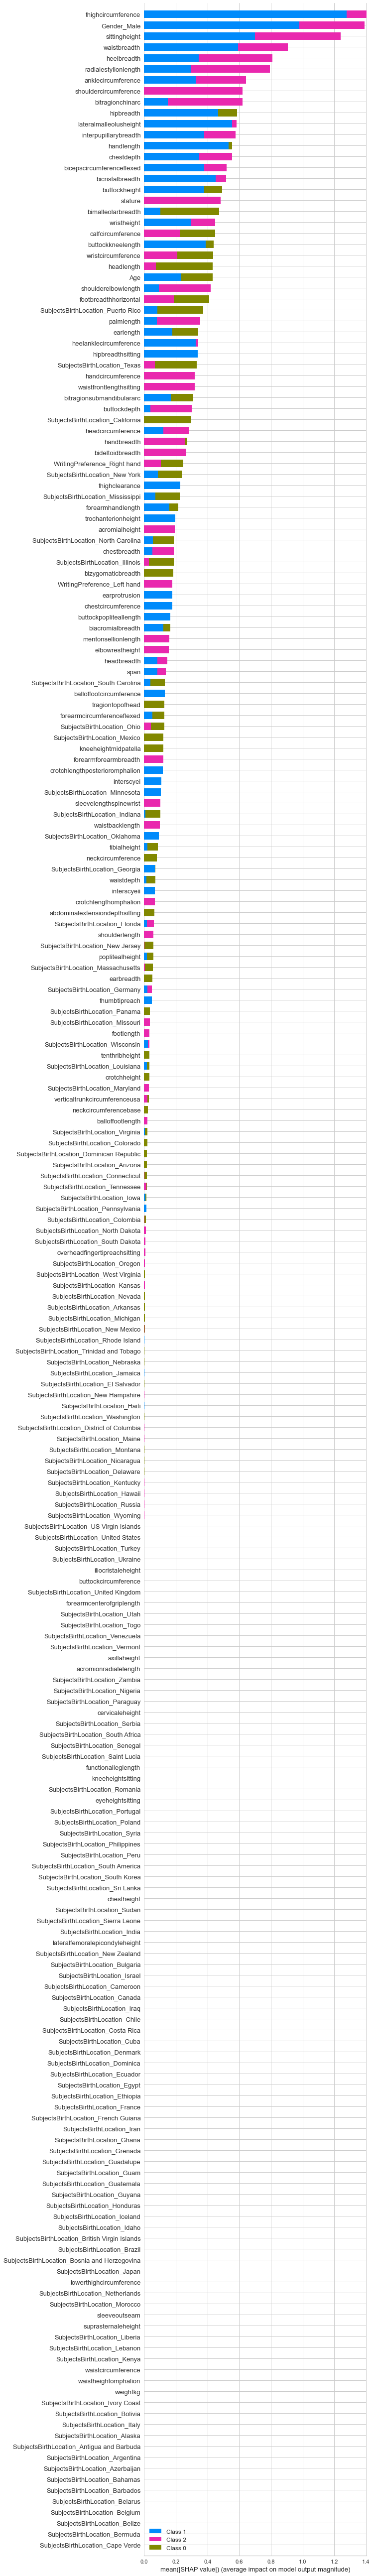

In [349]:
shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns) # Show the important features. But I should extract Hispanic features

In [350]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

# I created a list of features that are important to Hispanic.

In [351]:
#list(X.columns)

In [352]:
X3 = df[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.DODRace 
# new data

In [353]:
X3.shape

(5769, 154)

In [354]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=101, stratify =y) # new train split

In [355]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [356]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [357]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3) # Check scores. Better result with fewer columns.

Test_Set
[[ 98  11  27]
 [ 13 217  30]
 [123 101 534]]
              precision    recall  f1-score   support

       Black       0.42      0.72      0.53       136
    Hispanic       0.66      0.83      0.74       260
       White       0.90      0.70      0.79       758

    accuracy                           0.74      1154
   macro avg       0.66      0.75      0.69      1154
weighted avg       0.79      0.74      0.75      1154


Train_Set
[[ 442   28   73]
 [  49  879  110]
 [ 510  364 2160]]
              precision    recall  f1-score   support

       Black       0.44      0.81      0.57       543
    Hispanic       0.69      0.85      0.76      1038
       White       0.92      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.69      0.79      0.71      4615
weighted avg       0.81      0.75      0.77      4615



In [358]:
m = Pipeline(steps=operations)

scores = cross_validate(m, X_train3, y_train3, scoring=scoring, cv = 10)
df_scores = pd.DataFrame(scores, index= range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic           0.741721
test_precision_Hispanic    0.673315
test_recall_Hispanic       0.828585
dtype: float64

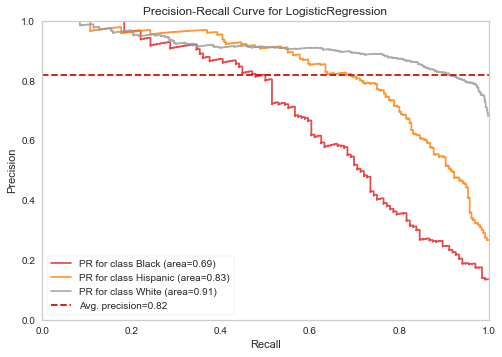

In [359]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();
#  The power of this model to detect Hispanics : 0.35
# Better than previous results.

## SMOTE for X3 dataset

In [360]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [361]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [362]:
smote_pipeline_2.fit(X_train3, y_train3)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [363]:
eval_metric(smote_pipeline_2, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[100  10  26]
 [ 17 209  34]
 [139 106 513]]
              precision    recall  f1-score   support

       Black       0.39      0.74      0.51       136
    Hispanic       0.64      0.80      0.71       260
       White       0.90      0.68      0.77       758

    accuracy                           0.71      1154
   macro avg       0.64      0.74      0.67      1154
weighted avg       0.78      0.71      0.73      1154


Train_Set
[[ 442   26   75]
 [  62  863  113]
 [ 529  381 2124]]
              precision    recall  f1-score   support

       Black       0.43      0.81      0.56       543
    Hispanic       0.68      0.83      0.75      1038
       White       0.92      0.70      0.79      3034

    accuracy                           0.74      4615
   macro avg       0.68      0.78      0.70      4615
weighted avg       0.81      0.74      0.76      4615



In [364]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.732169
test_precision_Hispanic    0.672972
test_recall_Hispanic       0.805471
dtype: float64

## Find the best threshold for multiclassification

In [397]:
y2 = y.map({"Hispanic":1, "White":0, "Black":0}) # Return to binary.

In [398]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=101, stratify =y2)

In [399]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_shap_model2 = Pipeline(steps=operations)

In [400]:
pipe_shap_model2.fit(X_train4, y_train4)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [401]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)


Test_Set
[[765 129]
 [ 47 213]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       894
           1       0.62      0.82      0.71       260

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.87      0.85      0.85      1154


Train_Set
[[3081  496]
 [ 140  898]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3577
           1       0.64      0.87      0.74      1038

    accuracy                           0.86      4615
   macro avg       0.80      0.86      0.82      4615
weighted avg       0.89      0.86      0.87      4615



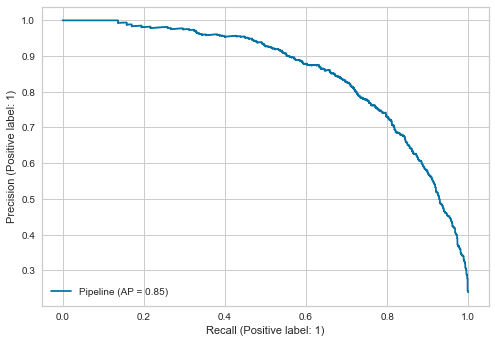

In [402]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000,random_state=101))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

In [403]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])

0.85224160954836

In [404]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [405]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3404045891703332

In [406]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [407]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

[[649 245]
 [ 30 230]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       894
           1       0.48      0.88      0.63       260

    accuracy                           0.76      1154
   macro avg       0.72      0.81      0.73      1154
weighted avg       0.85      0.76      0.78      1154



In [408]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

[[2649  928]
 [  73  965]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      3577
           1       0.51      0.93      0.66      1038

    accuracy                           0.78      4615
   macro avg       0.74      0.84      0.75      4615
weighted avg       0.87      0.78      0.80      4615



In [409]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [410]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

Accuracy      77.33%  std 1.88%
Precision-1   49.89%  std 2.22%
Recall-1      92.39%  std 4.01%
F1_score-1    64.74%  std 2.14%
